In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



## Read data

First, let's read both data files and check some rows

In [41]:
titanic_data = pd.read_csv("./input/titanic/train.csv")
test_data = pd.read_csv("./input/titanic/test - test.csv")
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Get some information about dataset

In [42]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe some properties of numerical features

In [43]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the previous data we have:
* Missing data 3 columns with missing data (Age,Cabin, Embarked)
* Categorical data 5 columns (Name, Sex, Ticket, Cabin, Embarked)
* Numerical data 6 columns ([PassengerId], Survived, Pclass, Age, SibSp, Parch, Fare)

Determine the type of numerical data
* Binary data (Survived)
* Continuous data (Fare, Age)
* Categorical data encoded (Pclass, SibSp, Parch)

In [44]:
print('Survived:', titanic_data.Survived.unique())
print('Pclass:', titanic_data.Pclass.unique())
print('SibSp:', titanic_data.SibSp.unique())
print('Parch:', titanic_data.Parch.unique())


Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


## Missing Data

From original info, we can see missing data in the columns : Age, Cabid and Embarked

In [45]:
print('Null Training data %:\n')

print(titanic_data.isnull().mean())

print('\nNull Test data data %:\n')
print(test_data.isnull().mean())


Null Training data %:

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Null Test data data %:

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


We fill missing data on both, training and test data

In training data:
* Embarked ( 2 values ). We use the mode -most repeated value- to fill missing data
* Cabin (77% missing). We do not have data to fill. So we fill data with 'Missing' label
* Age (19.8% missing). In this case we use mean for the continuous variable

In test data:
* Cabin and age, the same approach than in training data
* Fare, we use mean

In [46]:
pd.to_numeric(test_data['Fare'],errors='coerce',).describe()

count    405.000000
mean      84.748402
std      166.188349
min        0.000000
25%        7.879200
50%       14.500000
75%       59.400000
max      831.583000
Name: Fare, dtype: float64

In [47]:

test_data['Fare'] = pd.to_numeric(test_data['Fare'],errors='coerce')
## fill missing data 

# embarked, only 2 values not filled. We take the mode as the value to fill na
embarked_mode = titanic_data['Embarked'].mode().values[0]
titanic_data['Embarked'].fillna(embarked_mode, inplace=True)

# deck, too much info without fill. Any fill with a data it is not enough
titanic_data['Cabin'].fillna('Missing', inplace=True) 

# age
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# deck, too much info without fill. Any fill with a data it is not enough
test_data['Cabin'].fillna('Missing', inplace=True) 

# age
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)




In [48]:
buckets = [0, 10, 30, 50, 100] 
labels = ['1', '2', '3', '4'] 
titanic_data['Age_range'] = pd.cut(titanic_data['Age'], bins=buckets, labels=labels, include_lowest=True) 
test_data['Age_range'] = pd.cut(test_data['Age'], bins=buckets, labels=labels, include_lowest=True) 



## Encode categorical data
(Name, Sex, Ticket, Cabin, Embarked)

Let's first try to get an idea of the labels in each feature


In [49]:
print('Sex values:',titanic_data.Sex.unique(), test_data.Sex.unique())
print('Ticket values:',titanic_data.Ticket.unique().size,test_data.Ticket.unique().size)
print('Cabin values:',titanic_data.Cabin.unique().size,test_data.Cabin.unique().size)
print('Embarked values:',titanic_data.Embarked.unique(), test_data.Embarked.unique())

Sex values: ['male' 'female'] ['male' 'female']
Ticket values: 681 363
Cabin values: 148 77
Embarked values: ['S' 'C' 'Q'] ['Q' 'S' 'C']


Let's use onehot encodig for these characteristics having a fix value set. I also want to use the same approach for Pclass attribute. Althought it is already defined as an integer, it is a numeric representation for a class with fixed valueds. We will consider as fixed Sex & Embarked.
For the rest, we will use label encoder

In [50]:


temp = pd.get_dummies(titanic_data[['Sex']]) 
titanic_data = titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Sex']]) 
test_data = test_data.join(temp)

temp = pd.get_dummies(titanic_data[['Pclass']].astype(str)) 
temp.head()
titanic_data = titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Pclass']].astype(str)) 
test_data = test_data.join(temp)

temp = pd.get_dummies(titanic_data[['Embarked']]) 
titanic_data= titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Embarked']]) 
test_data= test_data.join(temp)

temp = pd.get_dummies(titanic_data[['Age_range']]) 
titanic_data= titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Age_range']]) 
test_data= test_data.join(temp)


## Label encoder
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
le.fit(titanic_data['Ticket']) 
titanic_data['Ticket_encoded'] = le.transform(titanic_data['Ticket']) 

le = LabelEncoder() 
le.fit(test_data['Ticket']) 
test_data['Ticket_encoded'] = le.transform(test_data['Ticket'])


le = LabelEncoder() 
le.fit(titanic_data['Cabin']) 
titanic_data['Cabin_encoded'] = le.transform(titanic_data['Cabin']) 

le = LabelEncoder() 
le.fit(test_data['Cabin']) 
test_data['Cabin_encoded'] = le.transform(test_data['Cabin'])





In [51]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_range',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_range_1', 'Age_range_2',
       'Age_range_3', 'Age_range_4', 'Ticket_encoded', 'Cabin_encoded'],
      dtype='object')

In [52]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age_range_1,Age_range_2,Age_range_3,Age_range_4,Ticket_encoded,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,1,0,1,0,0,523,146
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,1,0,596,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,1,0,0,669,146
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,1,0,49,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,1,0,0,1,0,472,146


## Feature scaling

For Fare & Age we will use a different approach using L2 normalization. L2 normalization will change the distribution of ower data. First let's plot histograms of both properties



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

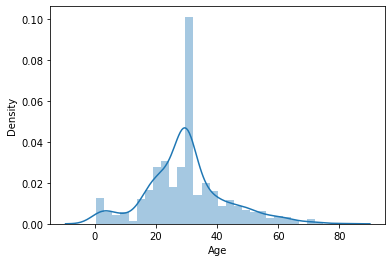

In [53]:
sns.distplot(titanic_data['Age'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

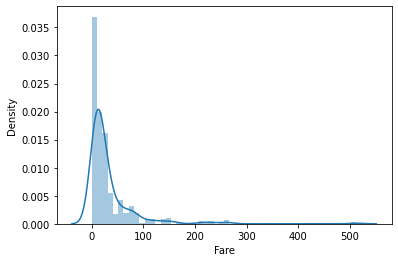

In [54]:
sns.distplot(titanic_data['Fare'])

In [55]:
from sklearn.preprocessing import RobustScaler 


data_unscaled = titanic_data[['Age','Fare']]

data_unscaled = data_unscaled.append(test_data[['Age','Fare']])

scaler = RobustScaler() 
scaler.fit(data_unscaled) 
data_scaled = scaler.transform(data_unscaled)

titanic_data_scaled = data_scaled[:titanic_data.shape[0]]
test_data_scaled    = data_scaled[titanic_data.shape[0]+1:]

titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = data_unscaled.columns) 
test_data_scaled = pd.DataFrame(test_data_scaled, columns = data_unscaled.columns) 


print(titanic_data_scaled.shape, test_data_scaled.shape)


(891, 2) (417, 2)


Let's check data has been normalized

In [56]:
test_data_scaled.info

<bound method DataFrame.info of           Age      Fare
0    1.330837 -0.259927
1    2.484683 -0.166787
2   -0.207624 -0.202310
3   -0.592240 -0.076679
4   -1.207624 -0.182816
..        ...       ...
412  0.044113 -0.223538
413  0.715452  3.271621
414  0.676991 -0.251263
415  0.044113 -0.223538
416  0.044113  7.246189

[417 rows x 2 columns]>

In [57]:
titanic_data[['Age_scaled','Fare_scaled']] = titanic_data_scaled[['Age','Fare']]
test_data[['Age_scaled','Fare_scaled']] = test_data_scaled[['Age','Fare']]

Let's see how the distribution has change

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_scaled', ylabel='Density'>

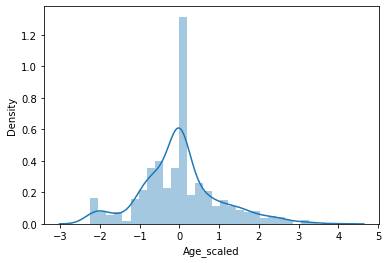

In [58]:
sns.distplot(titanic_data['Age_scaled'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_scaled', ylabel='Density'>

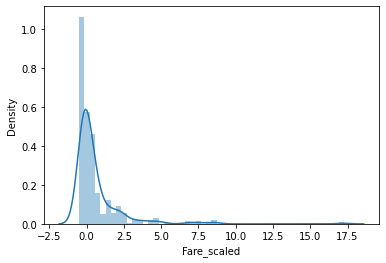

In [59]:
sns.distplot(titanic_data['Fare_scaled'])

## Get the train and test dataset

Although we can do a lot of more pre-processing on the data, such as discretization of continuous data, or outlier detection, we will stop here and generate the final train and test datasets by selecting appropiated columns

In [60]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_Q,Embarked_S,Age_range_1,Age_range_2,Age_range_3,Age_range_4,Ticket_encoded,Cabin_encoded,Age_scaled,Fare_scaled
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,1,0,0,0,1,0,152,76,1.330837,-0.259927
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,...,0,1,0,0,1,0,221,76,2.484683,-0.166787
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,...,1,0,0,0,0,1,73,76,-0.207624,-0.202310
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,...,0,1,0,1,0,0,147,76,-0.592240,-0.076679
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,...,0,1,0,1,0,0,138,76,-1.207624,-0.182816


<AxesSubplot:ylabel='Fare_scaled'>

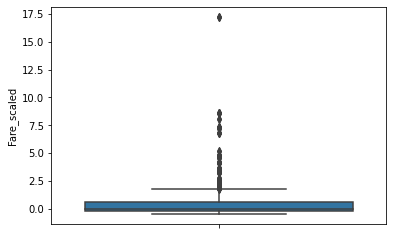

In [61]:
sns.boxplot(y=titanic_data['Fare_scaled'])

<AxesSubplot:ylabel='Age_scaled'>

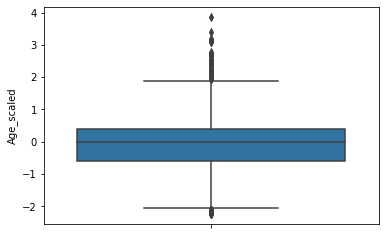

In [62]:
sns.boxplot(y=titanic_data['Age_scaled'])

In [63]:
IQR = titanic_data["Fare_scaled"].quantile(0.75) - titanic_data["Fare_scaled"].quantile(0.25)
lower_fare_limit = titanic_data["Fare_scaled"].quantile(0.25) - (IQR * 1.5) 
upper_fare_limit = titanic_data["Fare_scaled"].quantile(0.75) + (IQR * 1.5)
print(lower_fare_limit) 
print(upper_fare_limit) 

-1.4287001545702187
1.7721648841416502


In [64]:

titanic_data["Fare_normalized"]= np.where(titanic_data["Fare_scaled"] > upper_fare_limit, upper_fare_limit,
                               np.where(titanic_data["Fare_scaled"] < lower_fare_limit, lower_fare_limit, titanic_data["Fare_scaled"]))

test_data["Fare_normalized"]= np.where(test_data["Fare_scaled"] > upper_fare_limit, upper_fare_limit,
                               np.where(test_data["Fare_scaled"] < lower_fare_limit, lower_fare_limit, test_data["Fare_scaled"]))



<AxesSubplot:ylabel='Fare_normalized'>

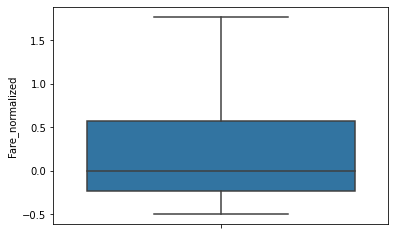

In [65]:
sns.boxplot(y=titanic_data['Fare_normalized'])

In [66]:
IQR = titanic_data["Age_scaled"].quantile(0.75) - titanic_data["Age_scaled"].quantile(0.25)
lower_fare_limit = titanic_data["Age_scaled"].quantile(0.25) - (IQR * 1.5) 
upper_fare_limit = titanic_data["Age_scaled"].quantile(0.75) + (IQR * 1.5)
print(lower_fare_limit) 
print(upper_fare_limit) 

-2.092239819004525
1.9077601809954754


In [67]:

titanic_data["Age_normalized"]= np.where(titanic_data["Age_scaled"] > upper_fare_limit, upper_fare_limit,
                               np.where(titanic_data["Age_scaled"] < lower_fare_limit, lower_fare_limit, titanic_data["Age_scaled"]))

test_data["Age_normalized"]= np.where(test_data["Age_scaled"] > upper_fare_limit, upper_fare_limit,
                               np.where(test_data["Age_scaled"] < lower_fare_limit, lower_fare_limit, test_data["Age_scaled"]))




<AxesSubplot:ylabel='Age_normalized'>

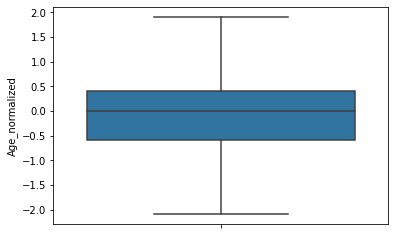

In [68]:
sns.boxplot(y=titanic_data['Age_normalized'])

In [69]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_range',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_range_1', 'Age_range_2',
       'Age_range_3', 'Age_range_4', 'Ticket_encoded', 'Cabin_encoded',
       'Age_scaled', 'Fare_scaled', 'Fare_normalized', 'Age_normalized'],
      dtype='object')

In [70]:
#selected_x_columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_range',
#       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
#       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_range_1', 'Age_range_2',
#       'Age_range_3', 'Age_range_4', 'Ticket_encoded', 'Cabin_encoded',
#       'Age_scaled', 'Fare_scaled', 'Fare_normalized', 'Age_normalized']

selected_x_columns = ['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_range_1', 'Age_range_2', 'Age_range_3', 'Age_range_4' ]
train_x = titanic_data[selected_x_columns]
test_x =  test_data[selected_x_columns]

train_y = titanic_data['Survived']
test_y = test_data['Survived']


In [71]:
train_x.head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_range_1,Age_range_2,Age_range_3,Age_range_4
0,0,1,0,0,1,0,1,0,0
1,1,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0
3,1,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,1,0


In [72]:
print(train_x.shape, test_x.shape)

(891, 9) (418, 9)


Let's generate a simple Keras model with a standard NN using the following layers 
Input Layer = 14
Hidden Layers = 30, 60, 30, 16
Output Layer = 1

We will use RELU activation for hidden layers and SIGMOID for output layer

We do not include neither dropout nor other reguralization techniques 

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


model = Sequential()

model.add(Dense(20, input_dim=train_x.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
...
# fit the keras model on the dataset
model.fit(train_x, train_y, validation_split=0.10, epochs=500, batch_size=300, verbose = 0)

model.evaluate(test_x,test_y)


14/14 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7799


[0.4967837929725647, 0.779904305934906]

In [74]:

test_y_calculated = (model.predict(test_x) > 0.5).astype("int32")


In [75]:
test_y.sum() - test_y_calculated.sum()

36

In [76]:
result = test_data.drop(columns='Survived').join(pd.DataFrame(test_y_calculated, columns=['Survived']))
result = result[['PassengerId', 'Survived']]

In [77]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


We got it. Let's submit our results

In [78]:
result.to_csv('submission.csv', index=False)